In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv("D:\PROGRAMMING AND SEO\Kaggle\Regression\Sales\Big-Mart-Sales-Prediction-master\ltrain.csv")
df2=pd.read_csv("D:\PROGRAMMING AND SEO\Kaggle\Regression\Sales\Big-Mart-Sales-Prediction-master\ltest.csv")
df=pd.concat([df1,df2],ignore_index=True)#here we have set ignore index true to get new indexes otherwise it will add old indexes
df.head()


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [72]:
df.shape

(14204, 12)

In [73]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [74]:
df.describe()#numercial variable analysis

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [75]:
#here we see the visibility is zero but thats impossible so we will deal that afterwards
#oulet_etablishment year varies from 1985 to 2009 but we can convert it into  a feture that can tell how old a store is..and that affects the output..i.e more the time the shop is established more is the sales amount
#categorical vaiable analysis
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [76]:
df.dtypes#returns the data type of each columns

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
dtype: object

In [77]:
cat_vars=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']#excluede the itrm identifier and outlet identifier as they contain id 
for i in cat_vars:
    print("Count of Each Categories of Column {}\n".format(i))
    print(df[i].value_counts())
    print("\n")



Count of Each Categories of Column Item_Fat_Content

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Count of Each Categories of Column Item_Type

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Count of Each Categories of Column Outlet_Location_Type

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


Count of Each Categories of Column Outlet_Size

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


In [78]:
#here the item_fat_content column contains LF,reg,low fat where LF and low fat are actually Low Fat and reg is Regular
#so we are going to replace them
#Change categories of low fat:
print('Original Categories:')
print(df['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())


Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [79]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [80]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)
 

In [81]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [82]:
df['Outlet_Size'].fillna('Medium',inplace = True)

In [83]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(),inplace=True)

In [84]:
df['Item_Visibility'].replace(0,df['Item_Visibility'].mean(),inplace=True)

In [85]:
sum(df['Item_Visibility']==0)

0

In [87]:
print(df['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [88]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,26


In [89]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [19]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,26


In [90]:
df['New_Item_Type']=[x[0:2] for x in df['Item_Identifier']]
df['New_Item_Type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [91]:
df.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years,New_Item_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4,DR


In [92]:
df1=df.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier'],axis=1)
df1.columns

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Size', 'Outlet_Type', 'Outlet_Years', 'New_Item_Type'],
      dtype='object')

In [93]:
df1['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

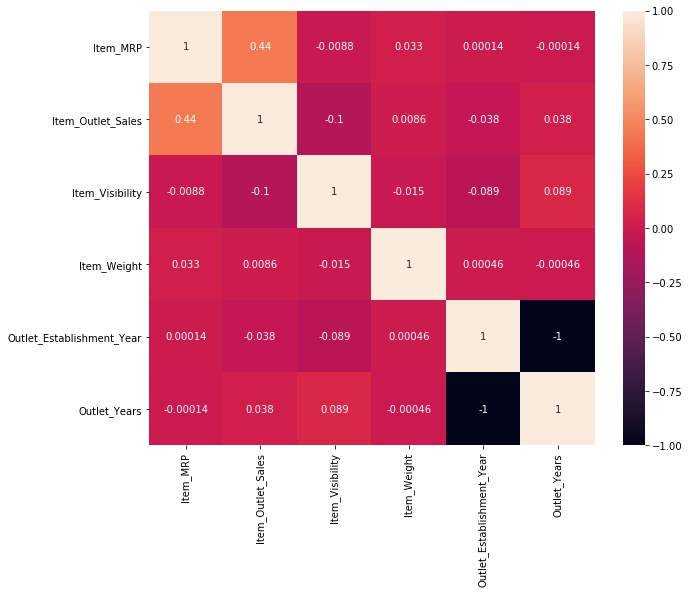

In [94]:
corr=df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

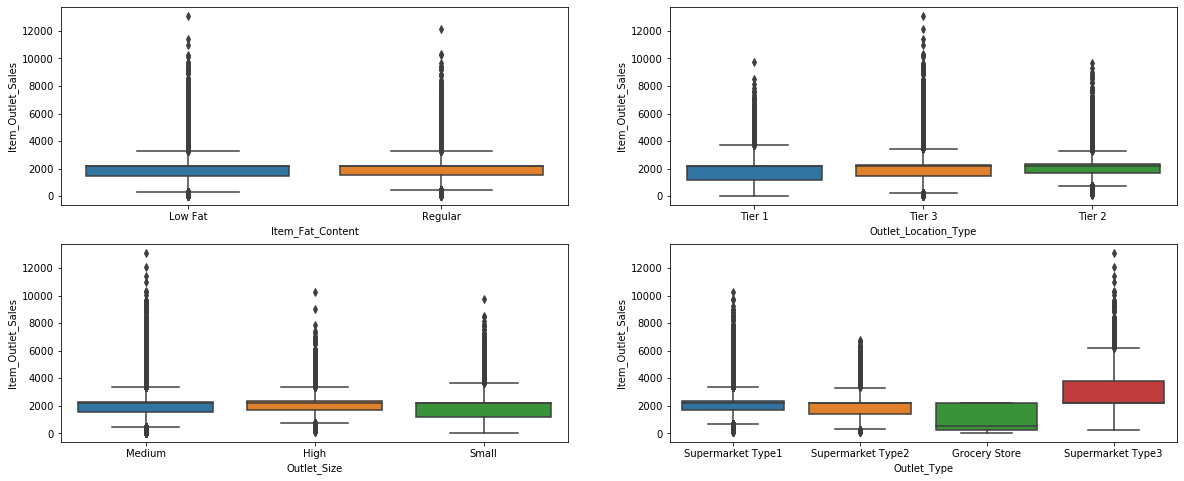

In [95]:
fig,axes=plt.subplots(2,2,figsize=(20,8))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df1,ax=axes[0][0])
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df1,ax=axes[0][1])
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1,ax=axes[1][0])
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df1,ax=axes[1][1])

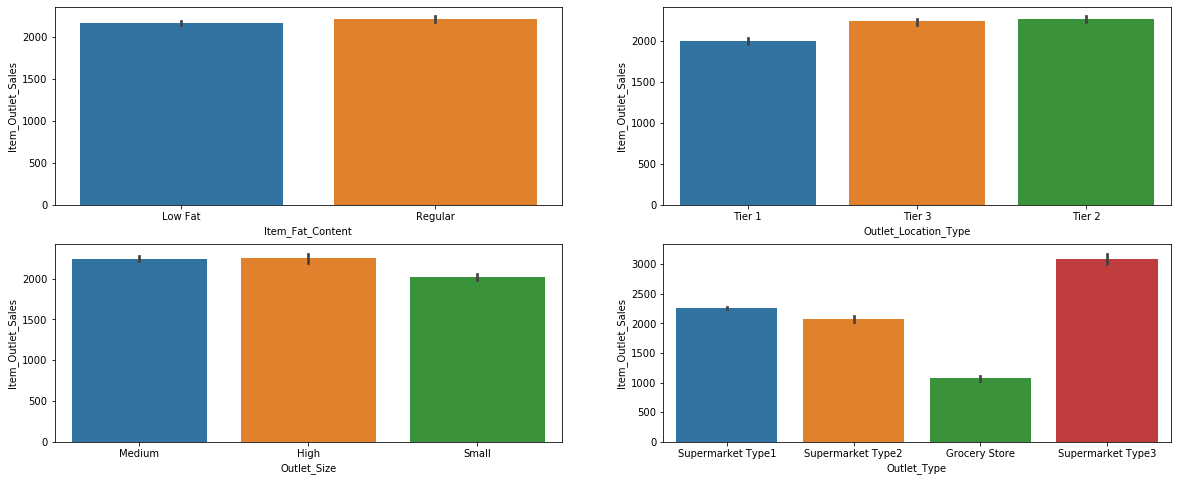

In [96]:
fig,axes=plt.subplots(2,2,figsize=(20,8))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df1,ax=axes[0][0])
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df1,ax=axes[0][1])
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1,ax=axes[1][0])
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df1,ax=axes[1][1])

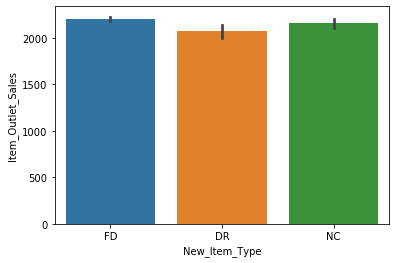

In [97]:
sns.barplot(x='New_Item_Type',y='Item_Outlet_Sales',data=df1)


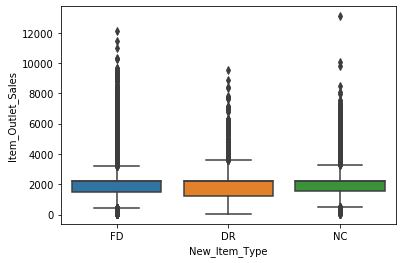

In [98]:
sns.boxplot(x='New_Item_Type',y='Item_Outlet_Sales',data=df1)

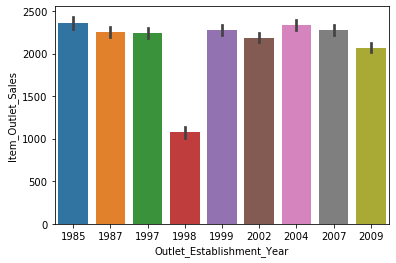

In [99]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df1)

In [100]:
df1=pd.get_dummies(data=df1,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','New_Item_Type'],drop_first=True)
df1.head(2)

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,New_Item_Type_FD,New_Item_Type_NC
0,249.8092,3735.1380,0.016047,9.30,1999,14,0,0,0,1,0,0,1,0,1,0
1,48.2692,443.4228,0.019278,5.92,2009,4,1,0,1,0,1,0,1,0,0,0


In [101]:
df1.drop(columns=['Outlet_Establishment_Year'],axis=1,inplace=True)
df1.columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Years', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'New_Item_Type_FD', 'New_Item_Type_NC'],
      dtype='object')

In [102]:
df1.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,New_Item_Type_FD,New_Item_Type_NC
0,249.8092,3735.1380,0.016047,9.30,14,0,0,0,1,0,0,1,0,1,0
1,48.2692,443.4228,0.019278,5.92,4,1,0,1,0,1,0,1,0,0,0
2,141.6180,2097.2700,0.016760,17.50,14,0,0,0,1,0,0,1,0,1,0
3,182.0950,732.3800,0.065953,19.20,15,1,0,1,0,0,0,1,0,1,0
4,53.8614,994.7052,0.065953,8.93,26,0,0,1,1,0,0,0,0,0,1


In [103]:
x=df1.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
y=df1.iloc[:,[1]]
x

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,New_Item_Type_FD,New_Item_Type_NC
0,249.8092,0.016047,9.30,14,0,0,0,1,0,0,1,0,1,0
1,48.2692,0.019278,5.92,4,1,0,1,0,1,0,1,0,0,0
2,141.6180,0.016760,17.50,14,0,0,0,1,0,0,1,0,1,0
3,182.0950,0.065953,19.20,15,1,0,1,0,0,0,1,0,1,0
4,53.8614,0.065953,8.93,26,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,141.3154,0.013496,10.50,16,1,0,0,1,0,0,0,1,1,0
14200,169.1448,0.142991,7.60,4,1,0,1,0,1,0,1,0,1,0
14201,118.7440,0.073529,10.00,11,0,1,0,1,0,0,1,0,0,1
14202,214.6218,0.065953,15.30,6,1,1,0,1,0,0,1,0,1,0


In [104]:
y

,Item_Outlet_Sales
0,3735.138000
1,443.422800
2,2097.270000
3,732.380000
4,994.705200
...,...
14199,2181.288914
14200,2181.288914
14201,2181.288914
14202,2181.288914


In [105]:
df1.shape

(14204, 15)

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(11363, 14)

In [107]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.fit_transform(y_test)

In [120]:
from sklearn.linear_model import LinearRegression
mod1=LinearRegression(fit_intercept=True,n_jobs=1)
mod1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
sco_train=mod1.score(x_train,y_train)
print('Training Score is:',sco_train)

Training Score is: 0.3409922461515622


In [110]:
sco_test=mod1.score(x_test,y_test)
print('Testing Score is:',sco_test)

Testing Score is: 0.3310259838331093


In [122]:
from sklearn.tree import DecisionTreeRegressor
mod2=DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
mod2.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=300, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [123]:
sco_train1=mod2.score(x_train,y_train)
print('Training Score is:',sco_train1)

Training Score is: 0.3602287875186492


In [124]:
sco_test1=mod2.score(x_test,y_test)
print('Testing Score is:',sco_test1)

Testing Score is: 0.34326919758183616


In [125]:
from sklearn.ensemble import RandomForestRegressor
mod3=RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
mod3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [126]:
sco_train2=mod3.score(x_train,y_train)
print('Training Score is:',sco_train2)

Training Score is: 0.3806810495585085


In [127]:
sco_test2=mod3.score(x_test,y_test)
print('Testing Score is:',sco_test2)

Testing Score is: 0.352260423222163


In [130]:
from sklearn.svm import SVR
mod4=SVR(kernel='rbf')
mod4.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [131]:
sco_train3=mod4.score(x_train,y_train)
print('Training Score is:',sco_train3)

Training Score is: 0.2779610473885563


In [132]:
sco_test3=mod4.score(x_test,y_test)
print('Testing Score is:',sco_test3)

Testing Score is: 0.2487753573352255


In [133]:
results=pd.DataFrame(columns=['Training','Testing'],index=['Linear','Decision Tree','Random Forest','SVR'])
train=[]
train.append(sco_train)
train.append(sco_train1)
train.append(sco_train2)
train.append(sco_train3)
test=[]
test.append(sco_train)
test.append(sco_train1)
test.append(sco_train2)
test.append(sco_train3)
results['Training']=train
results['Testing']=test
results

,Training,Testing
Linear,0.340992,0.340992
Decision Tree,0.360229,0.360229
Random Forest,0.380681,0.380681
SVR,0.277961,0.277961


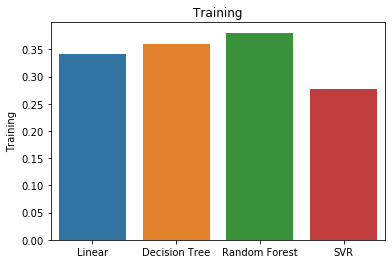

In [136]:
label1=['Linear','Decision Tree','Random Forest','SVR']
plt.title('Training')
sns.barplot(x=label1,y=results['Training'])


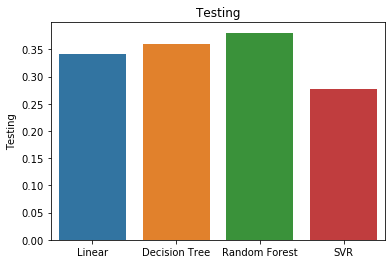

In [137]:
plt.title('Testing')
sns.barplot(x=label1,y=results['Testing'])